# Analyse Statistique

In [4]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from data_base import Bdd

#### Récupération des colonnes qui vont nous servir

In [7]:
v_vente = Bdd.get_v_ventes()

In [8]:
df = pd.DataFrame(v_vente, columns = ['Name','Genre','Publisher','Year', 'Platform','Global_Sales'])
df.head(10)

,Name,Genre,Publisher,Year,Platform,Global_Sales
0,Wii Sports,Sports,Nintendo,2006,Wii,83.0
1,Wii Sports Resort,Sports,Nintendo,2009,Wii,33.0
2,Wii Fit,Sports,Nintendo,2007,Wii,23.0
3,Wii Fit Plus,Sports,Nintendo,2009,Wii,22.0
4,FIFA 16,Sports,Electronic Arts,2015,PS4,8.0
5,Mario & Sonic at the Olympic Games,Sports,Sega,2007,Wii,8.0
6,FIFA 14,Sports,Electronic Arts,2013,PS3,7.0
7,Zumba Fitness,Sports,505 Games,2010,Wii,7.0
8,FIFA 12,Sports,Electronic Arts,2011,PS3,7.0
9,FIFA 15,Sports,Electronic Arts,2014,PS4,7.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16327 non-null  object 
 1   Genre         16327 non-null  object 
 2   Publisher     16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Platform      16327 non-null  object 
 5   Global_Sales  16327 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 765.5+ KB


In [10]:
df.describe()

,Year,Global_Sales
count,16327.000000,16327.000000
mean,2006.406443,0.459117
std,5.828981,1.600075
min,1980.000000,0.000000
25%,2003.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,0.000000
max,2020.000000,83.000000


In [11]:
df.corr()

,Year,Global_Sales
Year,1.000000,-0.071529
Global_Sales,-0.071529,1.000000


#### Camembert représentant les ventes gloables pour chaque genre

In [18]:
gg = Bdd.get_v_genre_vglobal()
gg

[('Sports', 83.0),
 ('Platform', 40.0),
 ('Racing', 36.0),
 ('Sports', 33.0),
 ('Role-Playing', 31.0),
 ('Platform', 30.0),
 ('Puzzle', 30.0),
 ('Misc', 29.0),
 ('Platform', 29.0),
 ('Shooter', 28.0),
 ('Simulation', 25.0),
 ('Racing', 23.0),
 ('Sports', 23.0),
 ('Role-Playing', 23.0),
 ('Sports', 22.0),
 ('Misc', 22.0),
 ('Action', 21.0),
 ('Platform', 21.0),
 ('Action', 21.0),
 ('Misc', 20.0),
 ('Platform', 18.0),
 ('Role-Playing', 18.0),
 ('Platform', 17.0),
 ('Role-Playing', 16.0),
 ('Action', 16.0),
 ('Action', 16.0),
 ('Shooter', 15.0),
 ('Racing', 15.0),
 ('Puzzle', 15.0),
 ('Role-Playing', 15.0),
 ('Shooter', 15.0),
 ('Role-Playing', 15.0),
 ('Role-Playing', 14.0),
 ('Shooter', 14.0),
 ('Shooter', 14.0),
 ('Shooter', 14.0),
 ('Shooter', 14.0),
 ('Fighting', 13.0),
 ('Shooter', 13.0),
 ('Action', 13.0),
 ('Shooter', 13.0),
 ('Platform', 12.0),
 ('Shooter', 12.0),
 ('Action', 12.0),
 ('Simulation', 12.0),
 ('Platform', 12.0),
 ('Racing', 12.0),
 ('Racing', 12.0),
 ('Action', 12.0

In [19]:
dr = pd.DataFrame(gg, columns = ['Genre', 'Global_Sales'])
dr.head(10)

,Genre,Global_Sales
0,Sports,83.0
1,Platform,40.0
2,Racing,36.0
3,Sports,33.0
4,Role-Playing,31.0
5,Platform,30.0
6,Puzzle,30.0
7,Misc,29.0
8,Platform,29.0
9,Shooter,28.0


array([<AxesSubplot:ylabel='freq'>], dtype=object)

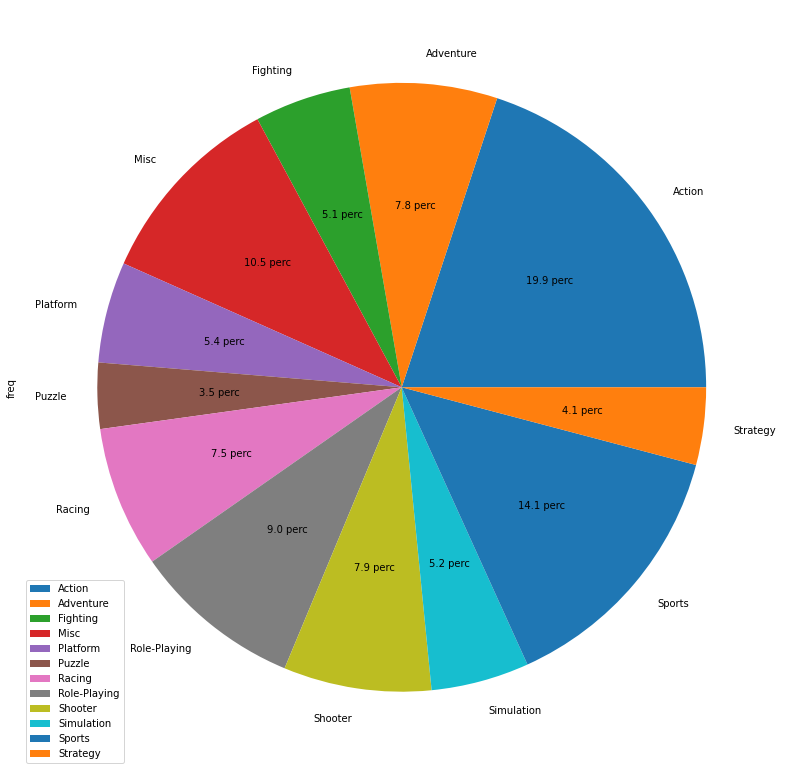

In [20]:
coco = pd.crosstab(dr.Genre, 'freq')
coco.plot.pie(subplots=True, figsize = (14, 14), autopct="%1.1f perc")

#### plot bar  des ventes globales par années

In [21]:
gy =df.groupby('Year')['Global_Sales'].sum()
y = gy.iloc[:]
index = gy.index

Text(0.5, 1.0, "Ventes globales en millions d'exemplaires par an")

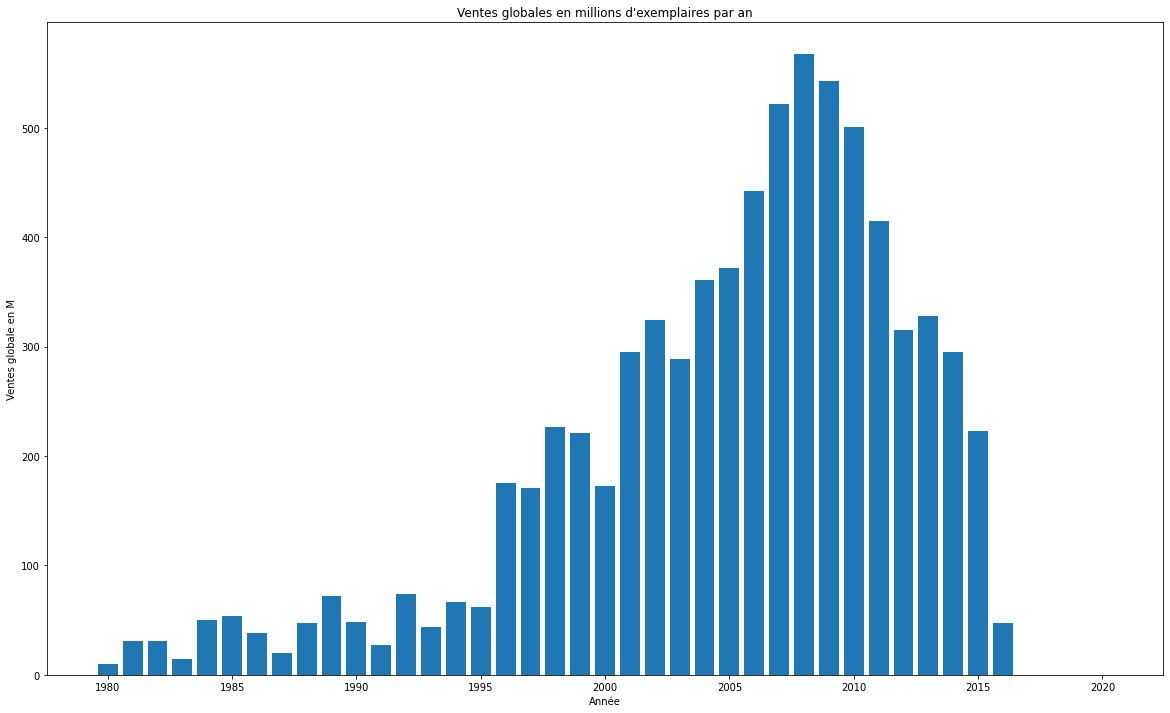

In [22]:
plt.figure(figsize = (20,12))
plt.bar(index,y)

plt.xlabel('Année')
plt.ylabel('Ventes globale en M')
plt.title('Ventes globales en millions d\'exemplaires par an')

#### Affichage des ventes par années en fonction de la plateforme

In [23]:
gg = df.groupby('Platform')['Global_Sales'].sum()
gg = gg.sort_values(ascending = False)
gg = pd.DataFrame(gg)

selection = gg.iloc[:6,:0]
print(selection.index)

Index(['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS'], dtype='object', name='Platform')


In [30]:
selection2 = ['PS3', 'PS4', 'X360', 'XOne', 'WiiU', '3DS', 'PC']
selection3 = ['NES', 'NG', 'SNES', 'N64', 'GB', '2600' ]
selection5 = ['PS', 'PS2', 'PS3', 'PS4', 'PSP']

In [25]:
df2 = df.copy()

for ligne in df2.index :
    if df2['Platform'][ligne] not in selection.index :
        df2.drop(index=ligne, inplace=True)

In [16]:
df3 = df.copy()

for ligne in df3.index :
    if df3['Platform'][ligne] not in selection2 :
        df3.drop(index=ligne, inplace=True)

In [17]:
df4 = df.copy()

for ligne in df4.index :
    if df4['Platform'][ligne] not in selection3 :
        df4.drop(index=ligne, inplace=True)

In [31]:
df5 = df.copy()

for ligne in df5.index :
    if df5['Platform'][ligne] not in selection5 :
        df5.drop(index=ligne, inplace=True)

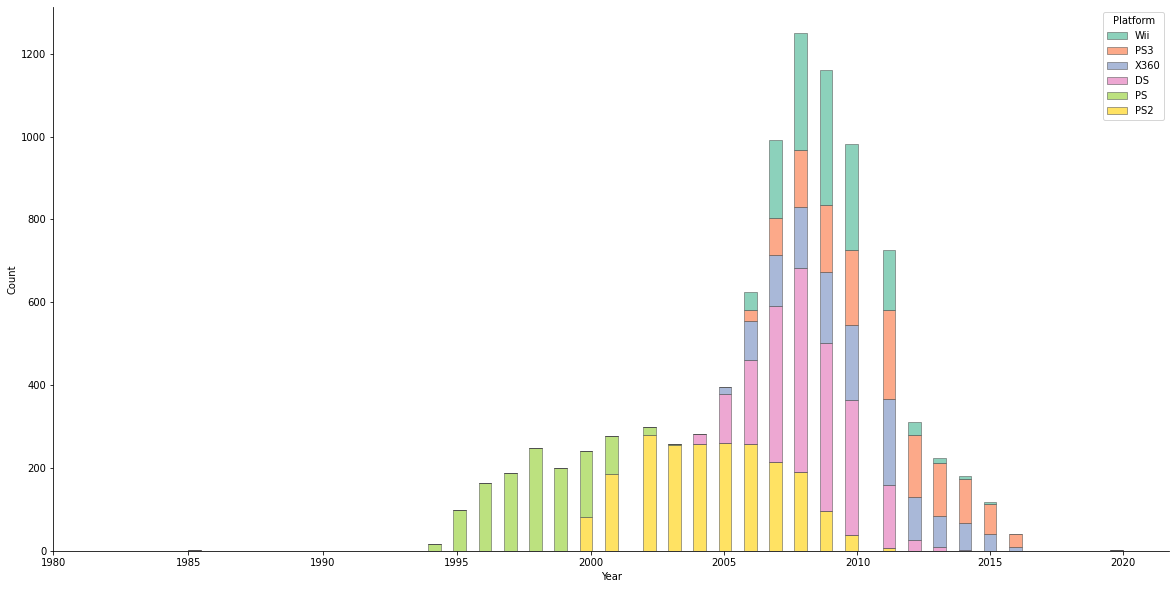

In [26]:
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f)

sns.histplot(
    df2,
    x="Year", hue="Platform",
    multiple="stack",
    palette="Set2",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mp.ticker.ScalarFormatter())
ax.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020])


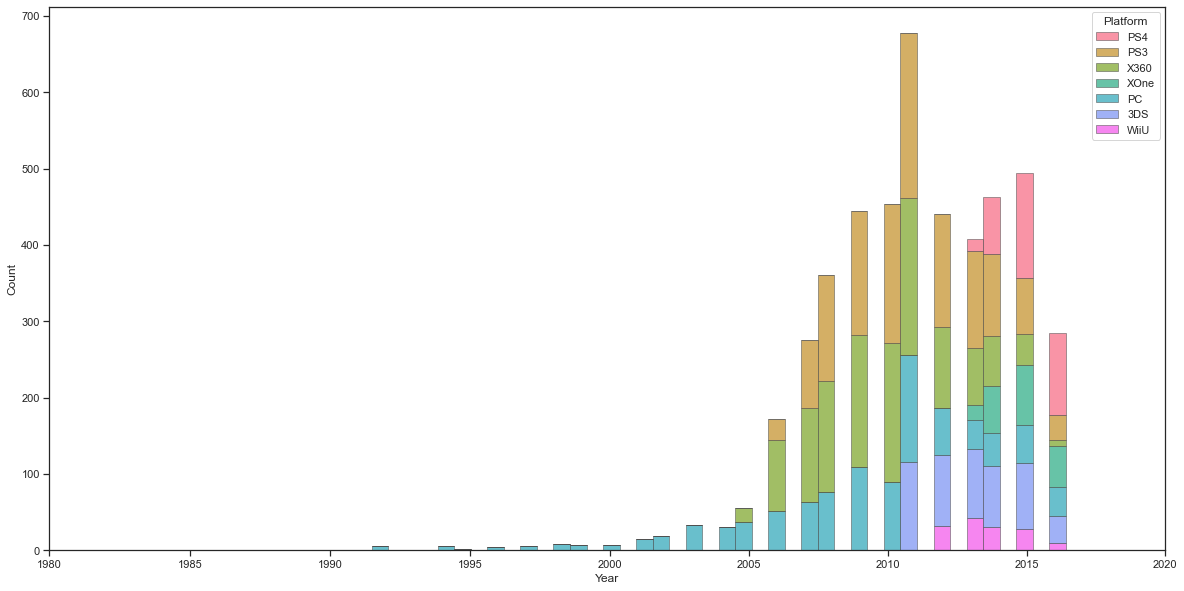

In [27]:
f3, ax3 = plt.subplots(figsize=(20, 10))
sns.despine(f)

sns.histplot(
    df3,
    x="Year", hue="Platform",
    multiple="stack",
    palette="husl",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax3.xaxis.set_major_formatter(mp.ticker.ScalarFormatter())
ax3.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020])

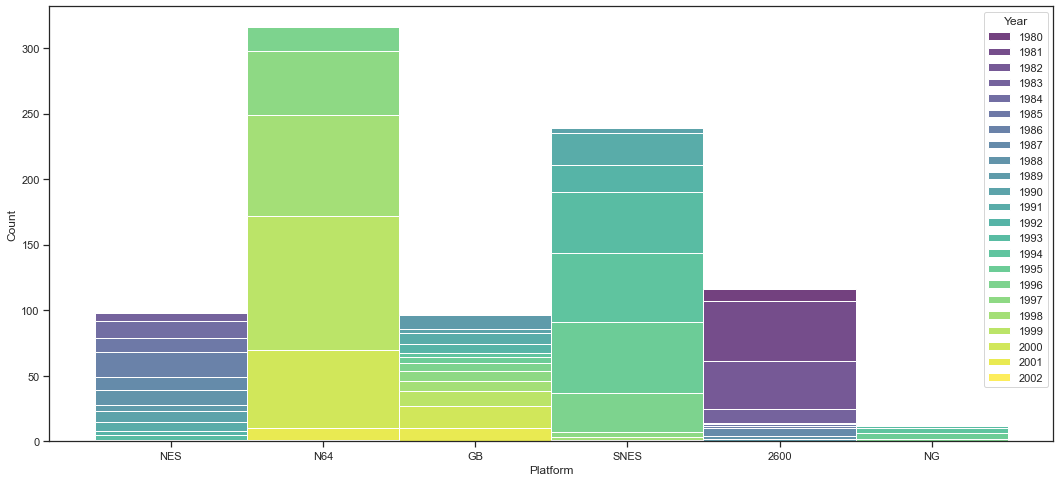

In [28]:
plt.figure(figsize=(18,8))
sns.histplot(data=df4, x="Platform", hue="Year", bins=4,  multiple="stack", palette="viridis",)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Density'>

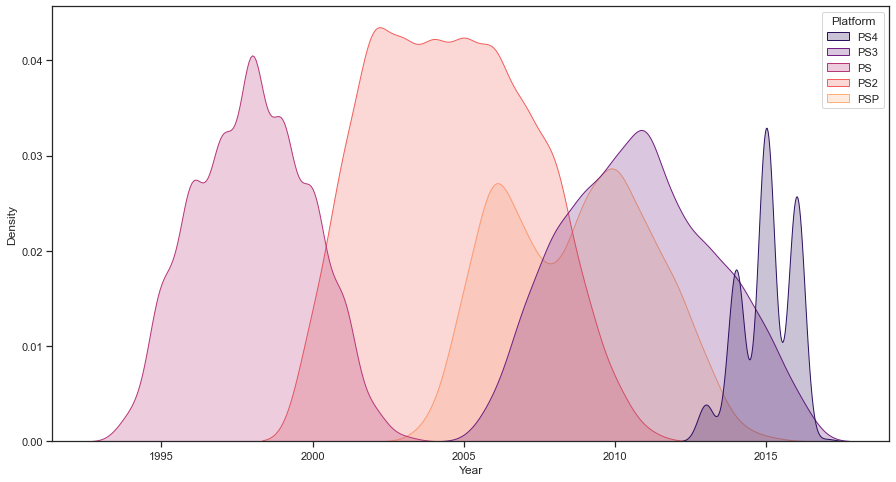

In [38]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df5, x="Year", hue="Platform",  palette="magma", fill=True)